In [210]:
import pandas as pd
import numpy as np

In [211]:
Datosagr=["Mi proyecto\Data\Broad.csv","Mi proyecto\Data\Frase.csv","Mi proyecto\Data\Kindle.csv","Mi proyecto\Data\Phase.csv"]


In [212]:
Muestra=[]
for archivos in Datosagr:
 df=pd.read_csv(archivos, sep=";")
 Muestra.append(df)



In [213]:
#test

In [214]:
datos_raw = pd.concat(Muestra, ignore_index=True)
datos_raw

,Estado,CAMPAIGN,Palabra clave,Tipo de coincidencia,Estado.1,Puja recomendada (bajo)(EUR),Puja recomendada (mediana)(EUR),Puja recomendada (alto)(EUR),Puja por palabra clave(EUR),PI del top de búsquedas,Impresiones,Clics,Tasa de clics (CTR),Inversión(EUR),Costo por clic (CPC)(EUR),Pedidos,Ventas(EUR),ACOS,KENP leídas,Estimación de regalías de KENP(EUR)
0,PAUSED,BROAD,victoria alvarez,BROAD,TARGETING_CLAUSE_PAUSED,0.15,0.18,0.31,0.10,NaN,98,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
1,PAUSED,BROAD,trono de cristal saga,BROAD,TARGETING_CLAUSE_PAUSED,0.12,0.14,0.15,0.10,50.0%,1766,1,0.0006,0.09,0.09,0,0.0,NaN,0,0.00
2,PAUSED,BROAD,trono de cristal,BROAD,TARGETING_CLAUSE_PAUSED,0.13,0.14,0.20,0.10,NaN,7,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3,PAUSED,BROAD,top libros juveniles,BROAD,TARGETING_CLAUSE_PAUSED,0.14,0.14,0.16,0.10,NaN,5,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
4,PAUSED,BROAD,tolkien aniversario,EXACT,TARGETING_CLAUSE_PAUSED,NaN,NaN,NaN,0.10,NaN,0,0,NaN,0.00,0.00,0,0.0,NaN,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,ENABLED,PHASE,archivo de tormentas,PHRASE,CAMPAIGN_PAUSED,0.13,0.16,0.22,0.10,891891891891892%,1713,2,0.0012,0.96,0.48,0,0.0,NaN,646,2.66
3426,ENABLED,PHASE,amazon libros,PHRASE,CAMPAIGN_PAUSED,0.14,0.16,0.26,0.10,6153846153846150%,449,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3427,ENABLED,PHASE,14 años libros,PHRASE,CAMPAIGN_PAUSED,NaN,NaN,NaN,0.10,53333333333333300%,256,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3428,ENABLED,PHASE,12 años,PHRASE,CAMPAIGN_PAUSED,0.17,0.21,0.33,0.08,3514328808446450%,990,5,0.0051,3.92,0.78,0,0.0,NaN,0,0.00


In [215]:
#eliminar columnas  estado  estado.1, pujas recomendadas, pl, acos, estimacion regalias [todas las sobrantes]

datos_raw = datos_raw.drop(labels=["Estado", "Estado.1","Puja recomendada (bajo)(EUR)", "Puja recomendada (mediana)(EUR)","Puja recomendada (alto)(EUR)","PI del top de búsquedas", "Puja por palabra clave(EUR)", "Tasa de clics (CTR)", "ACOS", "KENP leídas","Estimación de regalías de KENP(EUR)","Ventas(EUR)"], axis=1)
datos_raw

,CAMPAIGN,Palabra clave,Tipo de coincidencia,Impresiones,Clics,Inversión(EUR),Costo por clic (CPC)(EUR),Pedidos
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0


In [216]:
#simplificamos nombres de columnas complicadas

datos_raw= datos_raw.rename(columns={"Tipo de coincidencia": "concordancia", "Inversión(EUR)": "gasto", "Costo por clic (CPC)(EUR)": "CPC"})
datos_raw


,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0


In [226]:
#rentabilidad
datos_raw["clicks para vta"] = round(datos_raw["Clics"]/datos_raw["Pedidos"], 1)




In [225]:
datos_raw["coste venta"]=round(datos_raw["gasto"]/datos_raw["Pedidos"],1)
datos_raw


,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0,NaN,NaN
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0,inf,inf
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0,NaN,NaN
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0,NaN,NaN
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0,inf,inf
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0,NaN,NaN
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0,NaN,NaN
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0,inf,inf


In [227]:
datos_con_ventas = datos_raw[datos_raw["Pedidos"] > 0]
datos_con_ventas

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
85,BROAD,novelas juveniles 12 años,BROAD,161,4,2.44,0.61,1,4.0,2.4
94,BROAD,novelas de fantasia,BROAD,137,6,3.62,0.60,1,6.0,3.6
166,BROAD,literatura juvenil 16 años,BROAD,428,15,7.42,0.49,1,15.0,7.4
168,BROAD,literatura juvenil 12 años,BROAD,857,16,6.79,0.42,1,16.0,6.8
169,BROAD,literatura juvenil,BROAD,9223,57,31.80,0.56,3,19.0,10.6
...,...,...,...,...,...,...,...,...,...,...
3377,PHASE,laura gallego,EXACT,16433,47,20.58,0.44,1,47.0,20.6
3379,PHASE,las puertas de piedra,PHRASE,6105,9,1.03,0.11,2,4.5,0.5
3390,PHASE,juvenil,PHRASE,6724,43,31.91,0.74,3,14.3,10.6
3398,PHASE,harry potter libro,EXACT,8682,6,1.36,0.23,1,6.0,1.4


In [234]:
#HIPOTESIS 1 CONCORDANCIAS

datos_concordancia = datos_con_ventas.groupby("concordancia").agg({"Pedidos": "sum", "CPC": "mean", "clicks para vta":"mean", "coste venta":"mean", "Impresiones":"sum","Clics":"sum"})
datos_concordancia = datos_concordancia.round(1)
datos_concordancia

,Pedidos,CPC,clicks para vta,coste venta,Impresiones,Clics
concordancia,,,,,,
BROAD,127,0.6,9.4,5.7,101102,1246
EXACT,65,0.5,20.1,9.8,366093,1368
PHRASE,116,0.5,14.8,7.0,548476,1833


In [ ]:
#datos ventas



,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,click vta,coste venta
85,BROAD,novelas juveniles 12 años,BROAD,161,4,2.44,0.61,1,25.000000,2.440000
94,BROAD,novelas de fantasia,BROAD,137,6,3.62,0.60,1,16.666667,3.620000
166,BROAD,literatura juvenil 16 años,BROAD,428,15,7.42,0.49,1,6.666667,7.420000
168,BROAD,literatura juvenil 12 años,BROAD,857,16,6.79,0.42,1,6.250000,6.790000
169,BROAD,literatura juvenil,BROAD,9223,57,31.80,0.56,3,5.263158,10.600000
...,...,...,...,...,...,...,...,...,...,...
3377,PHASE,laura gallego,EXACT,16433,47,20.58,0.44,1,2.127660,20.580000
3379,PHASE,las puertas de piedra,PHRASE,6105,9,1.03,0.11,2,22.222222,0.515000
3390,PHASE,juvenil,PHRASE,6724,43,31.91,0.74,3,6.976744,10.636667
3398,PHASE,harry potter libro,EXACT,8682,6,1.36,0.23,1,16.666667,1.360000


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='concordancia', ylabel='Pedidos'>

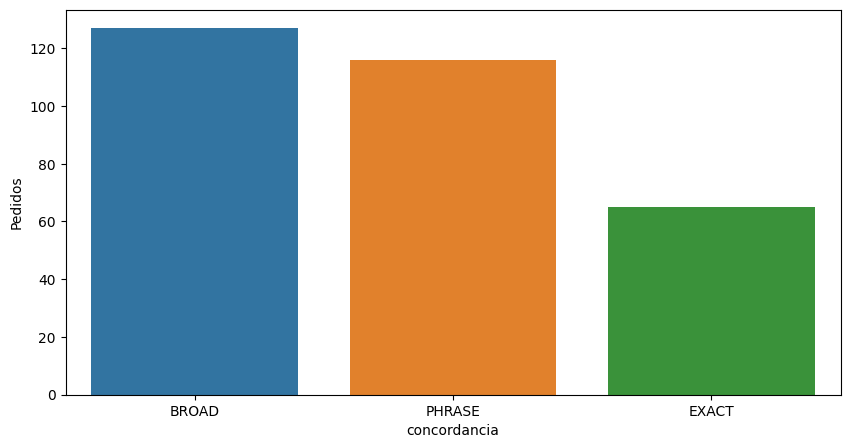

In [ ]:
#¿Qué resultados ofrece cada tipo?

plt.figure(figsize=(10,5))
sns.barplot(x="concordancia", y="Pedidos", data=datos_con_ventas, estimator=sum,  errorbar=None)



<AxesSubplot:xlabel='Clics', ylabel='Pedidos'>

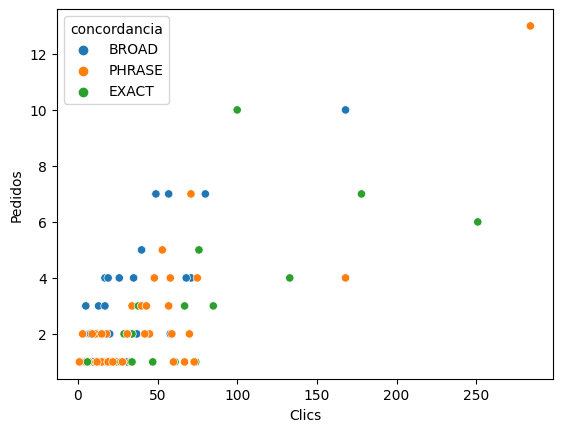

In [ ]:
#Relación de Clicks e Impresiones según concordancia


sns.scatterplot(x="Clics", y="Pedidos", hue="concordancia", data=datos_con_ventas)


In [251]:
#RENTABILIDAD SEGÚN CONCORDANCIA

datos_vtas_amplia = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "BROAD"]
datos_vtas_frase = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "PHRASE"]
datos_vtas_exacta= datos_con_ventas.loc[datos_con_ventas["concordancia"] == "EXACT"]

Text(0, 0.5, 'gasto')

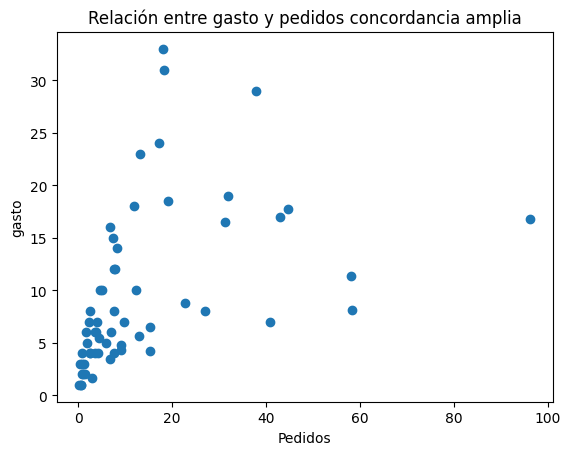

In [255]:
#RENTABILIDAD SEGÚN CONCORDANCIA 


plt.scatter(datos_vtas_amplia["gasto"], datos_vtas_amplia["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia amplia")
plt.xlabel("Pedidos")
plt.ylabel("gasto")


Text(0, 0.5, 'gasto')

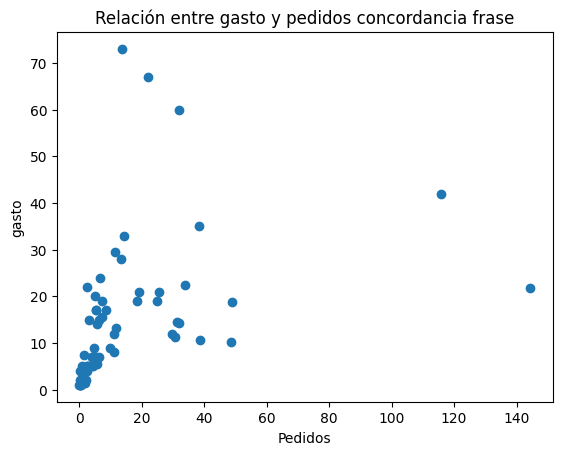

In [257]:
#RENTABILIDAD SEGÚN CONCORDANCIA FRASE


plt.scatter(datos_vtas_frase["gasto"], datos_vtas_frase["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

Text(0, 0.5, 'gasto')

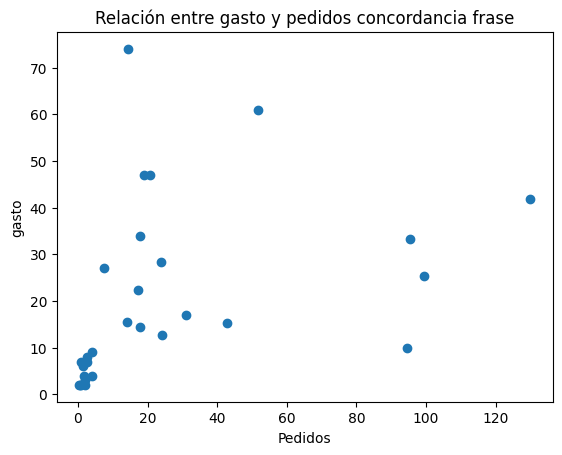

In [258]:
#RENTABILIDAD SEGÚN CONCORDANCIA EXACTA


plt.scatter(datos_vtas_exacta["gasto"], datos_vtas_exacta["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

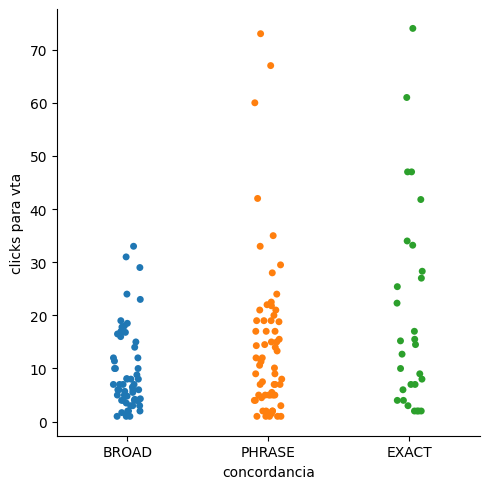

In [241]:
#clics para obtener una venta según concordancia
sns.catplot(x="concordancia", y="clicks para vta", hue="concordancia", data=datos_con_ventas);

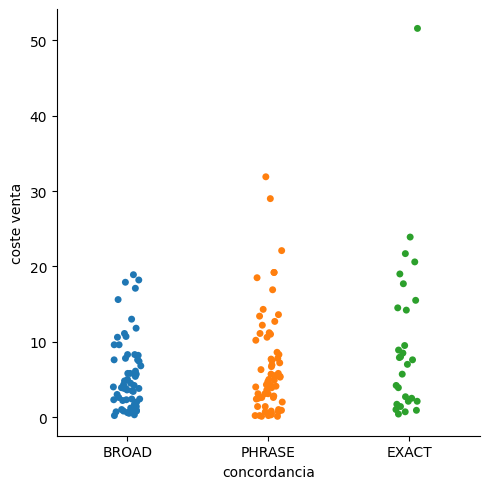

In [261]:
sns.catplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas);

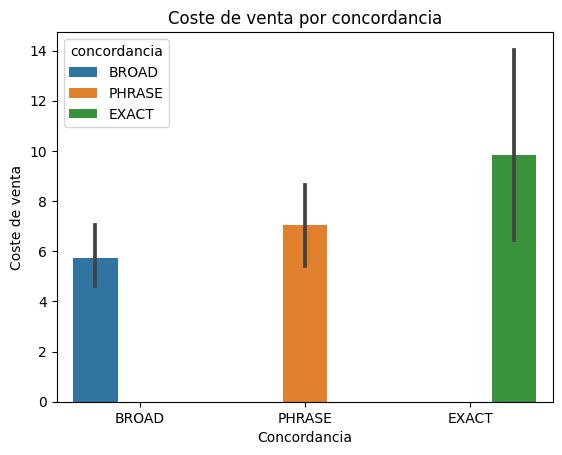

In [262]:


sns.barplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas)

plt.title("Coste de venta por concordancia")
plt.xlabel("Concordancia")
plt.ylabel("Coste de venta")

plt.show()


In [ ]:


# clicks para obtener una venta según categoria
datos.plot(kind="box", vert=False)

# Agregar título
plt.title("Distribución de los datos")

# Mostrar el gráfico
plt.show()